Выбери свой вариант из таблички курса и работай дальше с ним.


Вариант А. Сорта подсолнечника по регионам допуска.

https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B4%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%B8%D0%BA

(Таблица связи сортов подсолнечника и регионов допуска).


Вариант B. Сорта картофеля по регионам допуска.

https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%80%D1%82%D0%BE%D1%84%D0%B5%D0%BB%D0%B5%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE

(Таблица связи сортов картофеля и регионов допуска)

Вариант C. Производство сахарной свёклы по миру.

https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D1%81%D0%B2%D1%91%D0%BA%D0%BB%D0%B0

(Как географические координаты можно брать столицы стран).

Вариант D. Производство зелёного гороха по странам и годам.

https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D1%85


Вариант E. Крупнейшие производители сои (тысяч тонн).

https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%8F

Вариант F. Ведущие производители кукурузы (тысяч тонн)

https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%BA%D1%83%D1%80%D1%83%D0%B7%D0%B0

Вариант G. Список стран по производству риса

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B8%D1%81%D0%B0

Вариант H. Крупнейшие производители томатов в тысячах тонн

https://ru.wikipedia.org/wiki/%D0%A2%D0%BE%D0%BC%D0%B0%D1%82

Вариант I. Список стран по выращиванию ячменя

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%B2%D1%8B%D1%80%D0%B0%D1%89%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_%D1%8F%D1%87%D0%BC%D0%B5%D0%BD%D1%8F

Вариант J. Список стран по производству ржи

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D1%82%D1%80%D0%B0%D0%BD_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D1%83_%D1%80%D0%B6%D0%B8

Мною был выбран вариант А, поскольку показался наиболее сложным

# Часть 1. Скачай данные из табличек + информацию о географических данных (широта и долгота) + подчисти датасет. 3 балла.

In [ ]:
url = 'https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B4%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%B8%D0%BA'

In [ ]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from bs4 import BeautifulSoup
from requests.compat import urljoin, quote_plus, urlparse, unquote
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')
table = soup.find('table', class_='standard')
rows = table.find_all('tr')#Достаю строчки из таблицы, чтобы в них уже выбирать нужную информацию

In [ ]:
import re
access_region_link = urljoin('https://ru.wikipedia.org', table.find('a').get('href'))
access_region_link
html_regions = requests.get(access_region_link).text
soup_regions = BeautifulSoup(html_regions, 'lxml')
table_obl = soup_regions.find('ol')
rows_obl = table_obl.find_all('li')

In [ ]:
import numpy as np
dict_for_types = dict() #в этом словаре мы будем хранить информацию по гибридам: то, в каких регионах есть этот гибрид и какая средняя урожайность по регионах
dict_for_obl = dict()#В этом словаре храним информацию об области
for row in rows[1:]: #Первая строка это просто названия колонок
  nums = row.find_all('td')[2].text.split(', ') #добываем регионы, в которых есть гибрид
  name_of_type = row.find_all('td')[1].text[:-4]#добываем название гибриды
  for i in range(len(nums)):
    nums[i] = int(nums[i])
  dict_for_types[name_of_type] = dict([('regions', nums)])
  if len(nums) == 1 or (len(nums) == 2 and name_of_type == 'НК Фортими'):
    pattern = r'Средняя урожайность(?: в регионе)?\s*[—\-]?\s*([\d,]+)' #эта регулярка ищет фразу средняя урожайность с возможным появлением 'в регионе'(потому что у последней строки такого нет), после этого могут идти тире и пробелы, а затем мы просто добываем число (возможно, с запятыми).
    text = row.find_all('td')[3].text
    match = re.search(pattern, text)
    yield_value = float(match.group(1).replace(',', '.')) #так как число у нас - это первая группа захвата, мы его и берем
    if len(nums) == 1:
      dict_for_types[name_of_type][nums[0]] = yield_value
    else:
      dict_for_types[name_of_type][nums[0]] = yield_value
      dict_for_types[name_of_type][nums[1]] = yield_value
  elif len(nums) == 2:
    dict_for_types[name_of_type][nums[0]] = 22.5 #тут уже просто регулярка не поможет, потому что разные строки. Быстрее просто внести их средние значения
    dict_for_types[name_of_type][nums[1]] = 23.9
  elif len(nums) == 3:
    dict_for_types[name_of_type][nums[0]] = 31.7
    dict_for_types[name_of_type][nums[1]] = 28.5
    dict_for_types[name_of_type][nums[2]] = np.nan
  else:
    for i in range(6):
      dict_for_types[name_of_type][nums[i]] = 30.5
  for num in nums: #здесь мы достаем просто названия областей и ссылки на них
    curr_row = rows_obl[num - 1]
    region_name = curr_row.find('b').text
    region_num = num
    oblast_names = []
    oblast_links = []
    districts  = curr_row.find_all('a')
    for obl in districts:
      oblast_names.append(obl.get('title'))
      oblast_links.append(urljoin('https://ru.wikipedia.org', obl.get('href')))
      #можно было бы пойти менее читабельным путем: link = unquote(urljoin('https://ru.wikipedia.org', obl.get('href')))
      #                                             oblast_names.append(*link[len('https://ru.wikipedia.org/wiki/'):].split('_')))
    oblast_lon = []
    oblast_lat = []
    for link in oblast_links: #здесь мы достаем координаты областей
      oblast_html = requests.get(link).text
      soup_for_oblast = BeautifulSoup(oblast_html, 'lxml')
      obl_table = soup_for_oblast.find('table', class_='infobox')
      pattern = r'data-lat="([\d.]+)" data-lon="([\d.]+)"' #здесь появилась проблема с тем, что таблица на википедии странно работает и ее не получалось запарсить по номеру строки. Но я заметил, что координаты лежат по таким выражениям, поэтому запарсил через регулярку
      match = re.search(pattern, str(obl_table))
      if match: #у Крыма не очень ссылка, поэтому там координат не было
        lat = match.group(1)
        lon = match.group(2)
        oblast_lat.append(lat)
        oblast_lon.append(lon)
      else:
        oblast_lat.append(np.nan)
        oblast_lon.append(np.nan)
    for i in range(len(oblast_names)):
      dict_for_obl[oblast_names[i]] = dict([('region_num', num), ('region_name', region_name), ('oblast_lat', oblast_lat[i]), ('oblast_lon', oblast_lon[i])])
print(dict_for_types)
print(dict_for_obl)

{'НК Неома': {'regions': [5, 6, 7], 5: 31.7, 6: 28.5, 7: nan}, 'П 64 ЛЕ 25': {'regions': [6], 6: 26.3}, 'П 63 ЛЕ 10': {'regions': [5], 5: 24.5}, 'Сумико': {'regions': [5], 5: 32.3}, 'Енисей': {'regions': [5, 6, 7, 9, 10, 11], 5: 30.5, 6: 30.5, 7: 30.5, 9: 30.5, 10: 30.5, 11: 30.5}, 'ЛГ 59580': {'regions': [6], 6: 23.6}, 'НК Фортими': {'regions': [7, 8], 7: 20.3, 8: 20.3}, 'ПР 64 Ф 66': {'regions': [6], 6: 24.8}, 'ЕС Генезис': {'regions': [7, 8], 7: 22.5, 8: 23.9}, 'Сузука': {'regions': [7], 7: 25.1}}
{'Белгородская область': {'region_num': 5, 'region_name': 'Центрально-чернозёмный', 'oblast_lat': '50.766666666667', 'oblast_lon': '37.45'}, 'Воронежская область': {'region_num': 5, 'region_name': 'Центрально-чернозёмный', 'oblast_lat': '51.05', 'oblast_lon': '40.15'}, 'Курская область': {'region_num': 5, 'region_name': 'Центрально-чернозёмный', 'oblast_lat': '51.75', 'oblast_lon': '36.016666666667'}, 'Липецкая область': {'region_num': 5, 'region_name': 'Центрально-чернозёмный', 'oblast_la

In [ ]:
dict_of_sum_yields = dict() #этот словарь хранит суммарные урожаи по гибридам в данном регионе
hybrids_quant=dict() #этот словарь хранит количество различных гибридов в данном регионе
for key, value in dict_for_types.items():
  for num in value['regions']:
    if num in dict_of_sum_yields:
      dict_of_sum_yields[num] += value[num]
      hybrids_quant[num] += 1
    elif num == 7 and key=='НК Неома': #тут была проблема, что у 7го региона на сайте википедии не указана средняя урожайность по этому гибриду, поэтому просто не учитываем эту данную
      dict_of_sum_yields[num] = 0
      hybrids_quant[num] = 0
    else:
      dict_of_sum_yields[num] = 0
      hybrids_quant[num] = 0
      dict_of_sum_yields[num] += value[num]
      hybrids_quant[num] += 1
print(dict_of_sum_yields)
print(hybrids_quant)

{5: 119.0, 6: 133.70000000000002, 7: 98.4, 9: 30.5, 10: 30.5, 11: 30.5, 8: 44.2}
{5: 4, 6: 5, 7: 4, 9: 1, 10: 1, 11: 1, 8: 2}


In [ ]:
dict_of_average_yields = dict() #здесь просто находим среднее по урожайности
for key, value in dict_of_sum_yields.items():
  dict_of_average_yields[key] = round(dict_of_sum_yields[key]/hybrids_quant[key], 2)
print(dict_of_average_yields)

{5: 29.75, 6: 26.74, 7: 24.6, 9: 30.5, 10: 30.5, 11: 30.5, 8: 22.1}


In [ ]:
import pandas as pd
oblasti = pd.DataFrame(dict_for_obl)
oblasti = oblasti.T
oblasti['average_yield_all_sorts'] = np.nan
oblasti['quantity_of_hybrids'] = np.nan
for key, value in dict_for_types.items():
  oblasti[key] = False
  oblasti.loc[oblasti['region_num'].isin(value['regions']), key] = True
for key, value in dict_of_average_yields.items():
    oblasti.loc[(oblasti['region_num'] == key), 'average_yield_all_sorts'] = value
    if key == 7:
      oblasti.loc[oblasti['region_num'] == key, 'quantity_of_hybrids'] = hybrids_quant[key] + 1 #поскольку в том словаре мне нужно было среднее именно по тем значениям, которые я знаю, то для 7 было значение 4. Но на самом деле, в таблице в википедии встречается 5 7-к
    else:
      oblasti.loc[oblasti['region_num'] == key, 'quantity_of_hybrids'] = hybrids_quant[key]
oblasti.head()

,region_num,region_name,oblast_lat,oblast_lon,average_yield_all_sorts,quantity_of_hybrids,НК Неома,П 64 ЛЕ 25,П 63 ЛЕ 10,Сумико,Енисей,ЛГ 59580,НК Фортими,ПР 64 Ф 66,ЕС Генезис,Сузука
Белгородская область,5,Центрально-чернозёмный,50.766666666667,37.45,29.75,4.0,True,False,True,True,True,False,False,False,False,False
Воронежская область,5,Центрально-чернозёмный,51.05,40.15,29.75,4.0,True,False,True,True,True,False,False,False,False,False
Курская область,5,Центрально-чернозёмный,51.75,36.016666666667,29.75,4.0,True,False,True,True,True,False,False,False,False,False
Липецкая область,5,Центрально-чернозёмный,52.7,39.15,29.75,4.0,True,False,True,True,True,False,False,False,False,False
Орловская область,5,Центрально-чернозёмный,52.85,36.433333333333,29.75,4.0,True,False,True,True,True,False,False,False,False,False


# Часть 2. Визуализируй графики без учёта карт/координат (либо по годам, либо barplot - по категориям) - 2 балла.

Нужно сделать не менее 3 различных **информативных** графиков с учётом данных из части 1.

Для начала посмотрим, то, насколько разнообразны гибриды в каждом из регионов (в нашем случае это колонка 'quantity_of_hybrids)

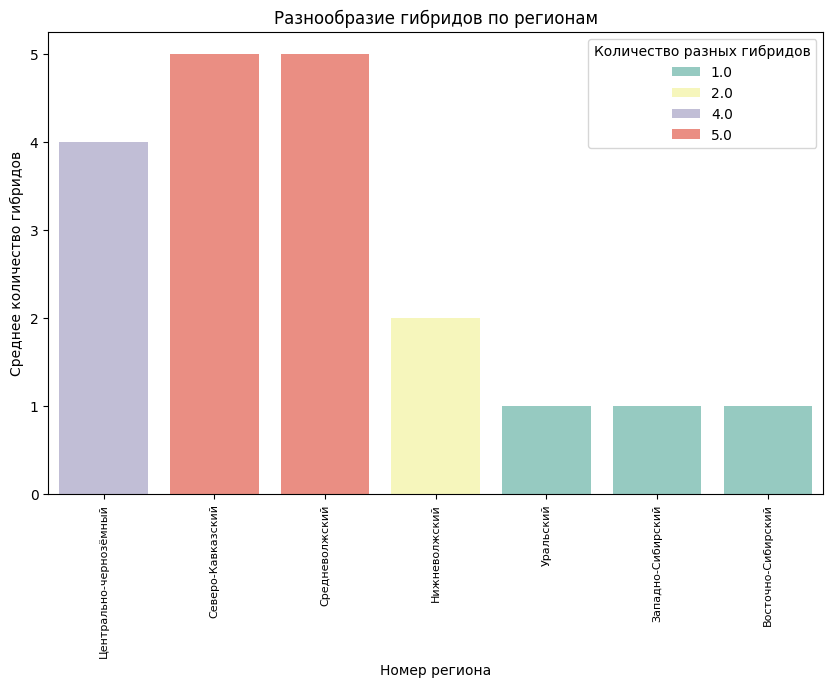

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
hybrids_diversity = oblasti.groupby('region_num')['quantity_of_hybrids'].first()
region_names = oblasti.groupby('region_num')['region_name'].first()
sns.barplot(x = region_names, y=hybrids_diversity, hue = hybrids_diversity, palette="Set3")
plt.xticks(rotation=90, fontsize=8)
plt.title('Разнообразие гибридов по регионам', fontsize=12)
plt.xlabel('Номер региона', fontsize=10)
plt.ylabel('Среднее количество гибридов', fontsize=10)
plt.legend(title='Количество разных гибридов')
plt.show()

Исходя из первого графика можно сделать следующие выводы:
  * Исходя из данных, полученных по 5-му региону, мы понимаем, что там много плодородных почв, развито сельское хозяйство, а потому и такое большое разнообразие, ведь условия благоприятствуют.
  * В 6-м регионе, казалось бы, должно быть много гор, непригодных для выращивания, но судя по разнообразию гибридов, можно предположить, что скорее всего их выращивают на равнинах с мягким климатом. К тому же, скорее всего в 7-м регионе довольно развито сельское хозяйство.
  * В 7-м регионе тоже скорее всего присутствуют плодородные почвы + исходя из того, что там произрастают гибриды, устойчивые к засухам можно сделать вывод о том, что регион засушлив, но гибриды адаптированны к этому.
  * В 8-м регионе скорее всего климат не очень пригоден для многих гибридов, а потому разнообразие там небольшое. Возможно, почвы неплодородные, возможно засушливый климат.
  * 9-й, 10 и 11-й регионы - по-видимому, регионы с очень суровым климатом, где может быть только какой-то один гибрид, который морозоустойчив и адаптирован к короткому лету.

---
Теперь построим график, на котором будут показаны доли урожайности от суммарной урожайности всех гибридов в целом. Это будет довольно информативно, поскольку по этим данным мы сможем сделать еще больше выводов о гибридах и о регионах в плане климата и в плане тех или иных свойств гибридов

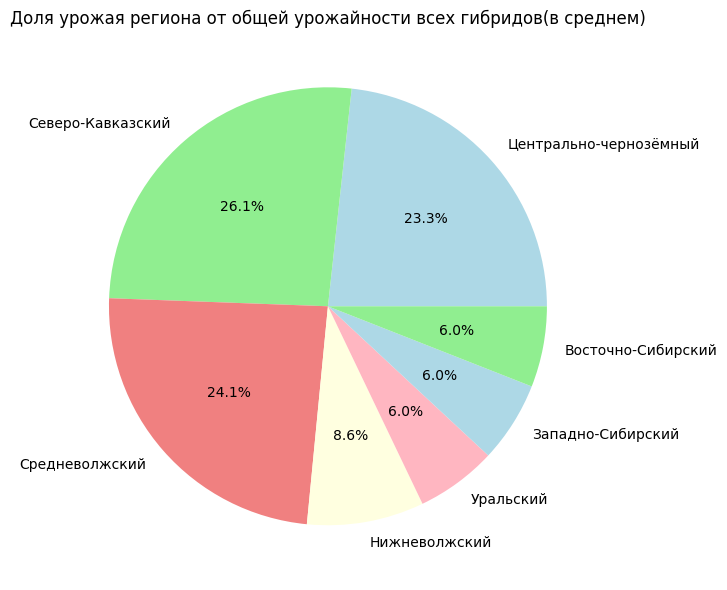

In [ ]:
plt.figure(figsize=(10, 6))
total_average_yield = oblasti.groupby('region_num')[['average_yield_all_sorts', 'quantity_of_hybrids']].first().apply(lambda x: x['average_yield_all_sorts'] * x['quantity_of_hybrids'], axis=1)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
plt.pie(total_average_yield, labels=region_names, colors=colors, autopct='%1.1f%%')
plt.title('Доля урожая региона от общей урожайности всех гибридов(в среднем)')
plt.tight_layout()
plt.show()

По этому графику можно сделать вывод, что больше всего урожая гибридов собирают в Северо-Кавказском регионе, и даже не в Центрально-Черноземном - он лишь на третьем месте. Видимо, в 6-м регионе гибриды лучше всего приспособлены к климату, в связи с чем их там выращивают большое количество. Про остальные регионы, в которых урожайность не такая большая как в первых трех, мы понимаем, что там тяжело выращивать гибриды из-за сурового климата и могут подойти лишь отдельные виды, в связи с чем и урожая от этих регионов поступает не очень много

---
Наконец, хочется посмотреть на то, а как соотносятся между собой средние урожайности по каждому из регионов. Это даст нам понять то, насколько правильно вообще высаживают в регионах те или иные гибриды и правда ли, что там, где их высаживают больше всех в среднем урожайность от одного гибрида выше

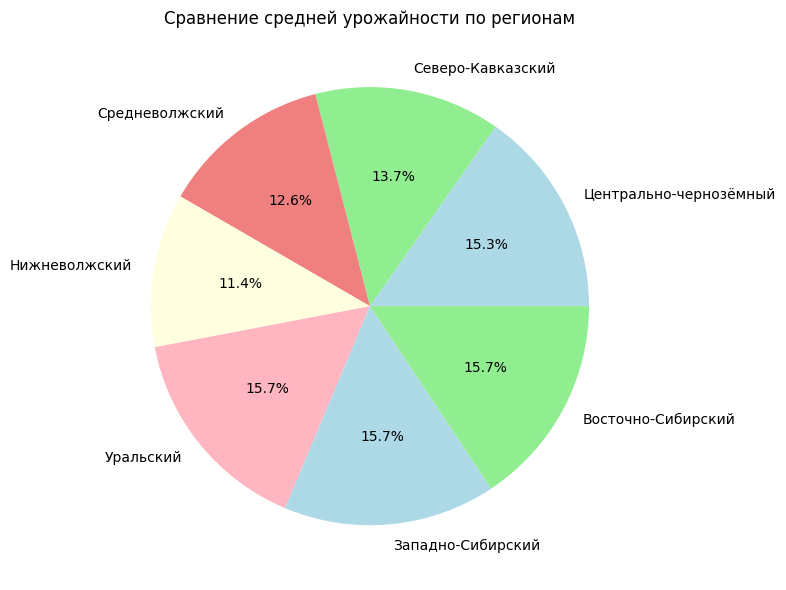

In [ ]:
plt.figure(figsize=(10, 6))
average_yield_region = oblasti.groupby('region_num')['average_yield_all_sorts'].first()
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
plt.pie(average_yield_region, labels=region_names, colors=colors, autopct='%1.1f%%')
plt.title('Сравнение средней урожайности по регионам')
plt.tight_layout()
plt.show()

Как мы видим, во всех регионах средняя урожайность примерно совпадает, что говорит нам о том, что на самом деле, на урожайность оказывает влияние даже не столько климатические условия в регионе, сколько правильно подобранный вид гибрида, который пригоден именно для этого региона. Кстати, скорее всего, в Центрально-Черноземном регионе не самая максимальная доля, потому что там выращивают много других культур, на которые тоже приходится большая доля посевных площадей. И что еще интересно - в Северо-Кавказском регионе, скорее всего так получилось, поскольку могут быть не самые большие посевные площади, а также поскольку не все гибриды пригодны для этого региона.

То есть, средняя урожайность зависит не только от климата, но и от пригодности гибридов к местным условиям, от технологий (скорее всего в Северо-Кавказском регионе они не самые развитые), количества выращиваемых сортов(чем больше сортов - тем меньше средняя урожайность. Это связано скорее всего с тем, что у каждого гибрида свои свойства и очень тяжело в одном регионе собдюсти все условия для них + каждый гибрид занимает все больше посевных площадей, что отнимает посевные площади у других гибридов).

<font color="violet"> Какие выводы можно сделать из этих графиков? </font>

Ну и общий, вывод, который бы я сделал:

Урожайность гибридов зависит не только от климата, но и от пригодности гибридов к местным условиям, что подтверждает успех сортов в Сибири (одна из самых высоких урожайностей). Благоприятные по климату регионы, несмотря на разнообразие гибридов, что казалось бы, говорит о том, что здесь должны быть самые лучшие условия и самая большая средняя урожайность, часто уступают в эффективности из-за выращивания на полях огромного множества культур. Скорее всего, именно современные технологии играют ключевую роль в преодолении холода и других суровых климатических условий, повышая урожайность даже в экстремальных условиях. А относительно низкие средние урожайности по регионам с большим количеством гибридов говорит о том, что в них нужно оптимизировать использование посевных площадей, засеивать сорта только с наибольшей урожайностью и не забывать про внедрение новых технологий.

# Часть 3. Визуализируй графики на картах при помощи plotly - 3 балла.

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
oblasti['average_yield_all_sorts'] = pd.to_numeric(oblasti['average_yield_all_sorts'])
oblasti['oblast_lat'] = pd.to_numeric(oblasti['oblast_lat'])
oblasti['oblast_lon'] = pd.to_numeric(oblasti['oblast_lon'])
oblasti['av_yield_scaled'] = oblasti['average_yield_all_sorts'] ** 6 #создаю этот столбец, чтобы круги на графике были хорошо различимы
oblasti.loc[:, 'names'] = list(oblasti.index)
fig = px.scatter_mapbox(oblasti, lat='oblast_lat', lon='oblast_lon', color = 'region_name', size = 'av_yield_scaled', hover_data={
        'average_yield_all_sorts': True,
        'oblast_lat': True,
        'oblast_lon': True,
        'av_yield_scaled': False,
        'names': True
    },
    zoom=3, height=500, mapbox_style='open-street-map', size_max=30, labels={'region_name': 'Регион',
                                                                             'average_yield_all_sorts': 'Средняя урожайность (ц/га)',
                                                                             'oblast_lat': 'Широта',
                                                                             'oblast_lon': 'Долгота',
                                                                             'names': 'Область'})
fig.update_layout(
    title={
        'text': "Средняя урожайность гибридов по регионам",
        'y': 0.95,
        'x': 0.45,
    }
)

fig.show()

In [ ]:
oblasti['total_yields_scaled'] = np.nan
for index in total_average_yield.index:
  oblasti.loc[oblasti[oblasti['region_num'] == index].index, 'total_yields_scaled'] = total_average_yield[index]**2

In [ ]:
oblasti['total_yields'] = np.nan
for index in total_average_yield.index:
  oblasti.loc[oblasti[oblasti['region_num'] == index].index, 'total_yields'] = total_average_yield[index]

In [ ]:
fig = px.scatter_mapbox(oblasti, lat='oblast_lat', lon='oblast_lon', color = 'region_name', size = 'total_yields_scaled', hover_data={
        'total_yields': True,
        'oblast_lat': True,
        'oblast_lon': True,
        'total_yields_scaled': False,
        'names': True
    },
    zoom=3, height=500, mapbox_style='open-street-map', size_max=40, labels={'region_name': 'Регион',
                                                                             'total_yields': 'Средняя общая урожайность (ц/га)',
                                                                             'oblast_lat': 'Широта',
                                                                             'oblast_lon': 'Долгота',
                                                                             'names': 'Область'})
fig.update_layout(
    title={
        'text': "Суммарная урожайность регионов по всем гибридам",
        'y': 0.95,
        'x': 0.45
    }
)

fig.show()

<font color="violet"> Какие выводы можно сделать из этих графиков? </font>

Эти графики только лишь подтверждают наши выводы о том, что конечно, в более теплых регионах выращивать растения проще, а потому больше гибридов засеиваются именно там(только если там нет засух, как в Нижневолжском). Тем не менее, в некоторых регионах необходимо более правильно выбирать сорты гибридов, использовать более современные технологии, правильно и эффективно использовать посевные площади, о чем говорит более низкая средняя урожайность в теплых регионах, и более высокая в холодных. На самом деле, карты просто делают все это более наглядным

# Часть 4. Получи данные о текущей погоде в этих географических точках при помощи Яндекс API - 4 балла.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из части 4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [ ]:
oblasti.drop('Сельское хозяйство Крыма', inplace=True) #удаляем эту строку, потому что у нее нет координат

In [ ]:
access_key = 'your_key'
oblasti['temperatures'] = np.nan
headers = {
    'X-Yandex-Weather-Key': access_key
}

response = requests.get('https://api.weather.yandex.ru/v2/forecast?lat=52.37125&lon=4.89388', headers=headers)

for obl in oblasti.index:

  query = f"""{{
    weatherByPoint(request: {{lat: {oblasti.loc[obl, 'oblast_lat']}, lon: {oblasti.loc[obl, 'oblast_lon']}}}) {{
      now {{
              temperature
            }}
    }}
  }}"""

  response = requests.post('https://api.weather.yandex.ru/graphql/query', headers=headers, json={'query': query})

  info = response.json()
  temperature = info['data']['weatherByPoint']['now']['temperature']
  oblasti.loc[obl, 'temperatures'] = temperature

# Часть 5. Визуализируй данные о погоде на картах при помощи plotly - 3 балла.

In [ ]:
oblasti['sizes'] = [50]*len(oblasti.index)
fig = px.scatter_mapbox(oblasti, lat='oblast_lat', lon='oblast_lon', size='sizes', color = 'temperatures', hover_data={
        'sizes': False,
        'temperatures': True,
        'names': True},
        zoom=3, height=500, mapbox_style='open-street-map', labels={'temperatures': 'Температура',
                                                                             'oblast_lat': 'Широта',
                                                                             'oblast_lon': 'Долгота',
                                                                             'names': 'Область'})
fig.update_layout(
    title={
        'text': "Температура по регионам",
        'y': 0.95,
        'x': 0.48,
    }
)

fig.show()